In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

# EDA

In [2]:
movies = pd.read_csv('my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df = movies.iloc[:,5:]
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


# Rule Set 1
* min_support = 0.3
* confidence = 100%

In [4]:
frequent_itemsets1 = apriori(df, min_support = 0.3, use_colnames = True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.4,"(Patriot, Sixth Sense)",2
5,0.6,"(Patriot, Gladiator)",2
6,0.4,"(Patriot, Sixth Sense, Gladiator)",3


In [5]:
rules1 = association_rules(frequent_itemsets1, min_threshold = 1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


* Visualization

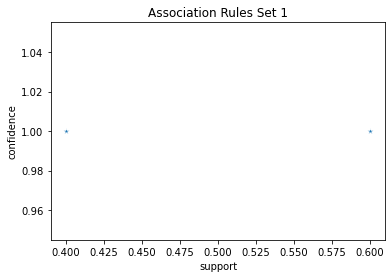

In [6]:
support = rules1.support
confidence = rules1.confidence
 
sns.scatterplot(data = rules1, x = support, y = confidence,  marker = "*", palette = 'Dark')
plt.title("Association Rules Set 1")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

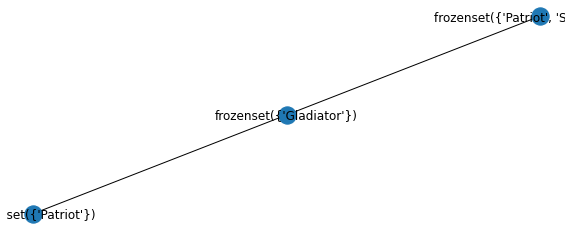

In [7]:
fig, ax = plt.subplots(figsize = (10,4))
GA = nx.from_pandas_edgelist(rules1, source = 'antecedents', target = 'consequents')
nx.draw(GA,with_labels = True)
plt.show()

# Rule Set 2
* min_support = 0.5
* confidence = 60%

In [8]:
frequent_itemsets2 = apriori(df, min_support = 0.5, use_colnames = True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.6,"(Patriot, Gladiator)",2


In [9]:
rules2 = association_rules(frequent_itemsets2, min_threshold = 0.60)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


* Visualization

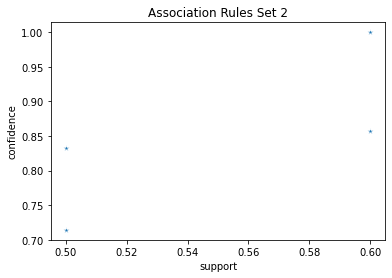

In [10]:
support = rules2.support
confidence = rules2.confidence
 
sns.scatterplot(data = rules2, x = support, y = confidence,  marker = "*", palette = 'Dark')
plt.title("Association Rules Set 2")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

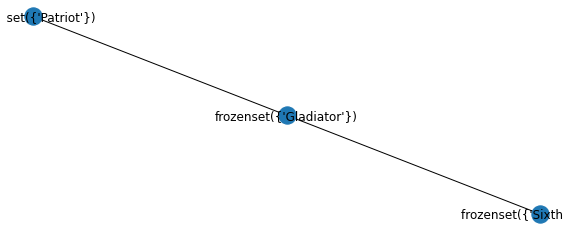

In [11]:
fig, ax = plt.subplots(figsize = (10,4))
GA = nx.from_pandas_edgelist(rules2, source = 'antecedents', target = 'consequents')
nx.draw(GA,with_labels = True)
plt.show()

# Rule Set 3
* min_support = 0.2
* confidence = 40%

In [12]:
frequent_itemsets3 = apriori(df, min_support = 0.2, use_colnames = True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Patriot, Sixth Sense)",2
9,0.2,"(Green Mile, Sixth Sense)",2


In [13]:
rules3 = association_rules(frequent_itemsets3, min_threshold = 0.40)
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


* Visualization

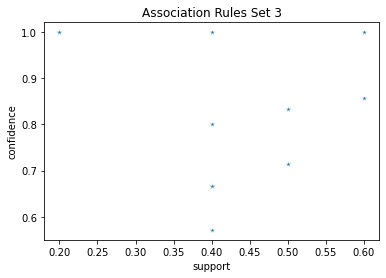

In [14]:
support = rules3.support
confidence = rules3.confidence
 
sns.scatterplot(data = rules3, x = support, y = confidence,  marker = "*", palette = 'Dark')
plt.title("Association Rules Set 3")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

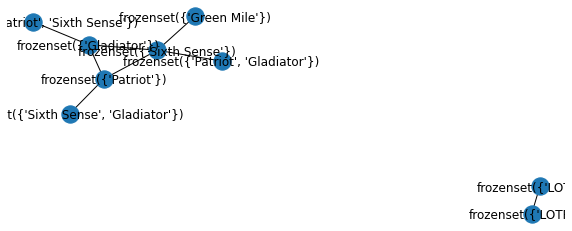

In [15]:
fig, ax = plt.subplots(figsize = (10,4))
GA = nx.from_pandas_edgelist(rules3,source = 'antecedents', target = 'consequents')
nx.draw(GA,with_labels = True)
plt.show()